# **Cirrhosis Prediction**

### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### **Importing the Dataset**

In [2]:
df = pd.read_csv('Dataset/cirrhosis.csv')
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


### **Checking Data Types**

In [3]:
df.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

### **Checking NaN in the Dataset**

In [4]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

### **Correlation**

C:\Users\Nitya\AppData\Local\Temp\ipykernel_26816\3907041050.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'BrBG')


<AxesSubplot:>

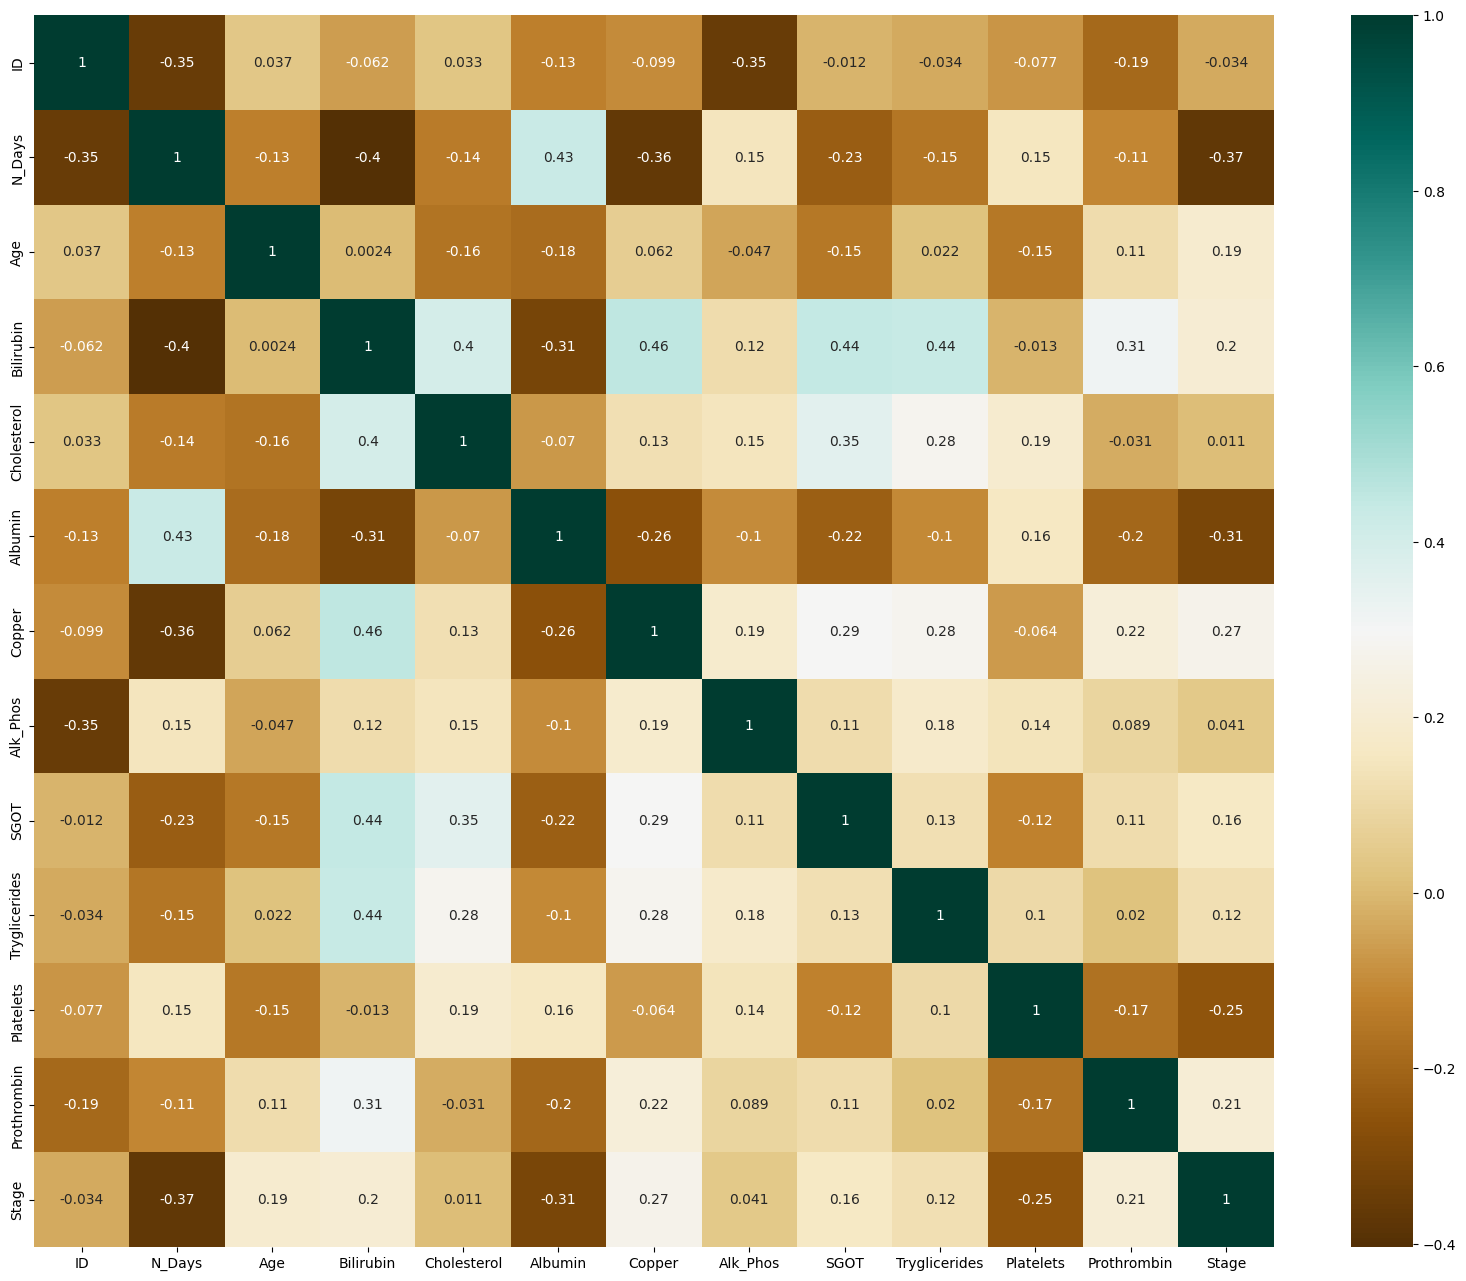

In [5]:
plt.figure(figsize = (20, 16))
sns.heatmap(df.corr(), annot = True, cmap = 'BrBG')

### **Data Preprocessing**

#### Getting Rid of Columns Not Needed

In [6]:
df = df.drop('ID', axis = 1)
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


#### Getting Rid of Rows with NaN in Column Drug

In [7]:
df = df.dropna(subset = 'Drug')
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


### **Adding a Rolling Average to Fill in the NaN**

In [8]:
from sklearn.impute import SimpleImputer

filled_nan = SimpleImputer(missing_values = np.nan, strategy = 'mean')
filled_nan.fit(df.iloc[:, 10:-1])

df.iloc[:, 10:-1] = filled_nan.transform(df.iloc[:, 10:-1])

df

C:\Users\Nitya\AppData\Local\Temp\ipykernel_26816\2924197352.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, 10:-1] = filled_nan.transform(df.iloc[:, 10:-1])


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [9]:
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

### **Determining the Age from the N_Days Column**

In [10]:
df['Age'] = (df['Age'] / 365).round()
df

C:\Users\Nitya\AppData\Local\Temp\ipykernel_26816\3214316913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = (df['Age'] / 365).round()


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,C,D-penicillamine,61.0,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,994,C,Placebo,58.0,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,939,C,D-penicillamine,62.0,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,839,C,D-penicillamine,38.0,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


### **One Hot Encoding Categorical Columns**

In [11]:
# Categorical data columns
categorical_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'] 

df_ohe = pd.get_dummies(df, columns = categorical_cols)

df_ohe

,N_Days,Status,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,400,D,59.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,...,0,0,1,0,1,0,1,0,0,1
1,4500,C,56.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,...,0,1,0,0,1,0,1,1,0,0
2,1012,D,70.0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,...,1,1,0,1,0,1,0,0,1,0
3,1925,D,55.0,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,...,0,1,0,0,1,0,1,0,1,0
4,1504,CL,38.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,...,0,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,C,61.0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,...,0,1,0,0,1,1,0,1,0,0
308,994,C,58.0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,...,0,1,0,1,0,1,0,1,0,0
309,939,C,62.0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,...,0,1,0,1,0,1,0,1,0,0
310,839,C,38.0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,...,0,1,0,1,0,1,0,1,0,0


In [12]:
df_ohe.columns

Index(['N_Days', 'Status', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin',
       'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage', 'Drug_D-penicillamine', 'Drug_Placebo', 'Sex_F',
       'Sex_M', 'Ascites_N', 'Ascites_Y', 'Hepatomegaly_N', 'Hepatomegaly_Y',
       'Spiders_N', 'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y'],
      dtype='object')

### **Encoding the Status (Dependent) into A Column**

In [13]:
df_ohe['Status'].unique()

array(['D', 'C', 'CL'], dtype=object)

In [14]:
encoded_status = []

for i in range(0, len(df_ohe['Status'])):
    if df_ohe['Status'].iloc[i] == 'D':
        encoded_status.append(0)
    elif df_ohe['Status'].iloc[i] == 'C':
        encoded_status.append(1)
    else:
        encoded_status.append(2)

df_ohe = df_ohe.drop(['Status'], axis = 1)
df_ohe['Status'] = encoded_status

df_ohe

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Status
0,400,59.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,...,0,1,0,1,0,1,0,0,1,0
1,4500,56.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,...,1,0,0,1,0,1,1,0,0,1
2,1012,70.0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,...,1,0,1,0,1,0,0,1,0,0
3,1925,55.0,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,...,1,0,0,1,0,1,0,1,0,0
4,1504,38.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,...,1,0,0,1,0,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,61.0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,...,1,0,0,1,1,0,1,0,0,1
308,994,58.0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,...,1,0,1,0,1,0,1,0,0,1
309,939,62.0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,...,1,0,1,0,1,0,1,0,0,1
310,839,38.0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,...,1,0,1,0,1,0,1,0,0,1


### **Splitting the Dataset into Independent and Dependent Variables**

In [15]:
X = df_ohe.drop(['Status'], axis = 1)
y = df_ohe['Status']

### **Split the Dataset into Train and Test Datasets**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 150)

### **View Training Datasets**

In [17]:
X_train

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
94,130,46.0,17.4,369.510563,2.64,182.0,559.0,119.35,124.702128,401.0,...,0,0,1,0,1,0,1,0,0,1
145,2615,34.0,1.2,369.510563,3.89,58.0,1284.0,173.60,124.702128,239.0,...,0,1,0,1,0,1,0,0,1,0
39,4467,47.0,1.3,369.510563,3.34,105.0,11046.6,104.49,124.702128,358.0,...,0,1,0,1,0,1,0,1,0,0
101,3099,57.0,0.9,248.000000,3.97,172.0,646.0,62.00,84.000000,128.0,...,0,1,0,1,0,1,0,1,0,0
85,1657,53.0,5.0,1600.000000,3.21,75.0,2656.0,82.15,174.000000,181.0,...,0,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,786,46.0,2.9,332.000000,3.60,86.0,1492.0,134.85,103.000000,277.0,...,0,1,0,0,1,1,0,1,0,0
252,1765,78.0,7.1,243.000000,3.03,380.0,983.0,158.10,154.000000,97.0,...,1,0,1,0,1,0,1,1,0,0
306,1149,31.0,0.8,273.000000,3.56,52.0,1282.0,130.00,59.000000,344.0,...,0,1,0,1,0,1,0,1,0,0
25,1444,52.0,5.2,1128.000000,3.68,53.0,3228.0,165.85,166.000000,421.0,...,0,1,0,0,1,0,1,1,0,0


In [18]:
y_train

94     0
145    1
39     1
101    1
85     0
      ..
142    0
252    1
306    1
25     0
228    0
Name: Status, Length: 249, dtype: int64

### **View the Testing Datasets**

In [19]:
X_test

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
37,3244,37.0,3.3,383.000000,3.53,102.0,1234.0,137.95,87.000000,234.0,...,0,1,0,0,1,0,1,1,0,0
152,2863,50.0,0.5,217.000000,3.85,68.0,453.0,54.25,68.000000,270.0,...,0,1,0,1,0,1,0,1,0,0
155,853,59.0,25.5,358.000000,3.52,219.0,2468.0,201.50,205.000000,151.0,...,0,1,0,0,1,1,0,1,0,0
273,1447,48.0,1.6,369.510563,3.07,136.0,1995.0,128.00,124.702128,372.0,...,0,1,0,1,0,1,0,1,0,0
310,839,38.0,2.0,247.000000,3.16,69.0,1050.0,117.00,88.000000,335.0,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,3422,43.0,0.7,303.000000,4.19,81.0,1584.0,111.60,156.000000,307.0,...,0,1,0,1,0,0,1,1,0,0
121,3297,55.0,0.6,298.000000,4.13,29.0,758.0,65.10,85.000000,256.0,...,0,1,0,1,0,1,0,1,0,0
91,388,77.0,1.4,206.000000,3.13,36.0,1626.0,86.80,70.000000,145.0,...,0,0,1,1,0,1,0,0,0,1
46,2576,47.0,0.5,316.000000,3.65,68.0,1716.0,187.55,71.000000,356.0,...,0,1,0,1,0,1,0,1,0,0


In [20]:
y_test

37     0
152    1
155    0
273    2
310    1
      ..
114    1
121    1
91     0
46     1
222    0
Name: Status, Length: 63, dtype: int64

### **XGBoost**

In [21]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder() # Encode target labels with value between 0 and n_classes - 1
# y_train_xg = le.fit_transform(y_train.copy())

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

xgbc = XGBClassifier()

xgbc.fit(X_train.copy(), y_train.copy())
kfold = KFold(n_splits = 8)
xgbc_scores = cross_val_score(estimator = xgbc, X = X_train.copy(), y = y_train.copy(), cv = kfold)
xgbc_scores

array([0.78125   , 0.70967742, 0.80645161, 0.70967742, 0.61290323,
       0.74193548, 0.77419355, 0.77419355])

#### Predict using XGBoost

In [23]:
y_pred_xg = xgbc.predict(X_test.copy())
y_pred_xg

array([0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0],
      dtype=int64)

#### XGBoost Confusion Matrix

<AxesSubplot:>

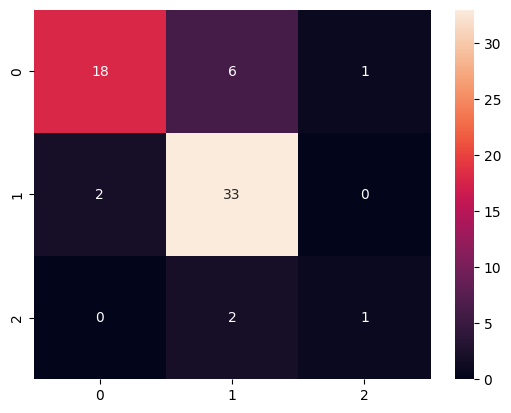

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_xg = confusion_matrix(y_test, y_pred_xg) 
sns.heatmap(cm_xg, annot = True)

#### XGBoost Distribution Plot

C:\Users\Nitya\AppData\Local\Temp\ipykernel_26816\3426673052.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred_xg)


<AxesSubplot:xlabel='Status', ylabel='Density'>

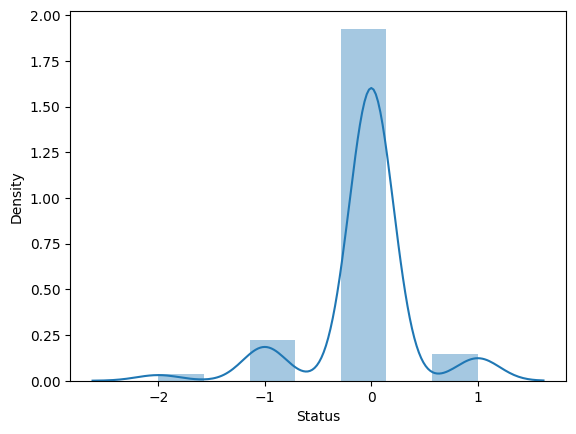

In [25]:
sns.distplot(y_test - y_pred_xg)

### **Random Forest Classifier**

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, criterion = "entropy")

rf.fit(X_train.copy(), y_train.copy())

rf_scores = cross_val_score(estimator = rf, X = X_train.copy(), y = y_train.copy(), cv = 8)
rf_scores

array([0.65625   , 0.74193548, 0.77419355, 0.80645161, 0.67741935,
       0.74193548, 0.70967742, 0.70967742])

#### Predict Using Random Forest Classification

In [27]:
y_pred_rf = rf.predict(X_test.copy())
y_pred_rf

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0],
      dtype=int64)

#### Random Forest Classification Confusion Matrix

<AxesSubplot:>

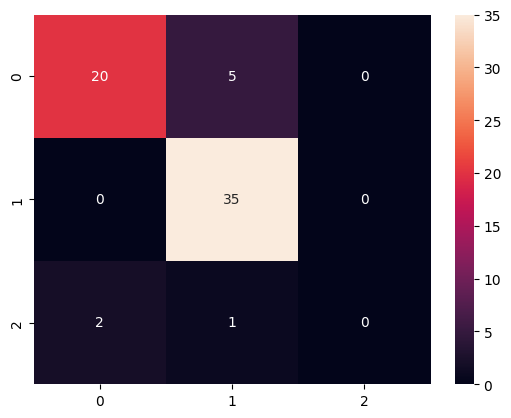

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_rf = confusion_matrix(y_test,y_pred_rf) 
sns.heatmap(cm_rf, annot = True)

#### Random Forest Classifier Distribution Plot

C:\Users\Nitya\AppData\Local\Temp\ipykernel_26816\892111478.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred_rf)


<AxesSubplot:xlabel='Status', ylabel='Density'>

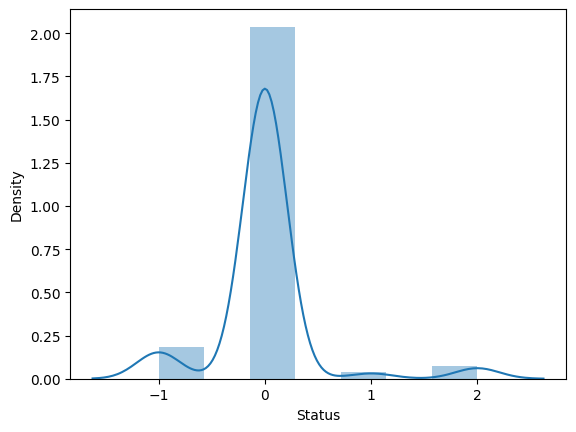

In [29]:
sns.distplot(y_test - y_pred_rf)

### **Comparison: XGBoost VS Random Forest Classifier**

In [30]:
from sklearn.metrics import mean_absolute_error

print(f"XGBoost Mean Score : {mean_absolute_error(y_test, y_pred_xg)}")
print(f"XGBoost Accuracy : {xgbc_scores.mean() * 100} %\n")

print(f"Random Forest Mean Score : {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Random Forest Accuracy : {rf_scores.mean()*100} %\n")

XGBoost Mean Score : 0.19047619047619047
XGBoost Accuracy : 73.87852822580645 %

Random Forest Mean Score : 0.15873015873015872
Random Forest Accuracy : 72.71925403225806 %

